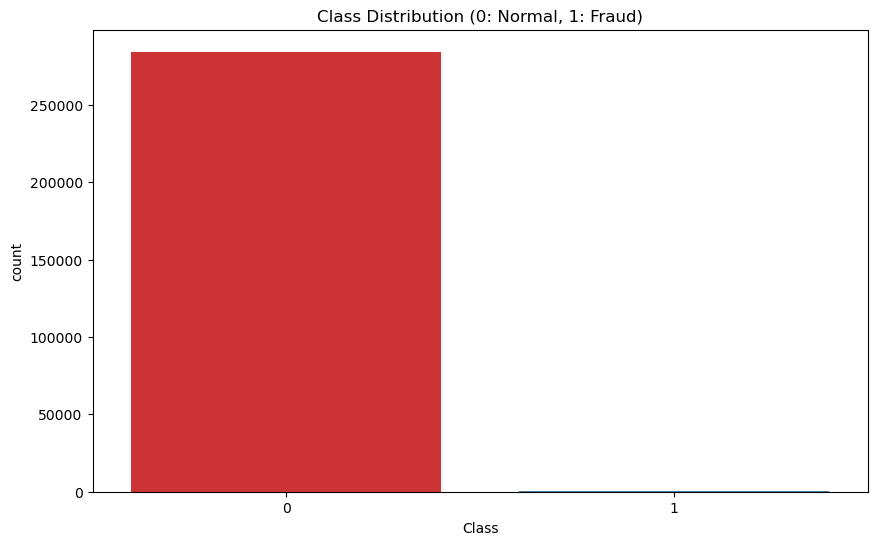

Summary Statistics for Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Summary Statistics for Normal Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Decision Tree Accuracy: 99.93%
Confusion Matrix (Decision Tree):
 [[71056    25]
 [   28    93]]

SVM Accuracy: 99.95%
Confusion Matrix (SVM):
 [[71079     2]
 [   34    87]]


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
dataset = pd.read_csv('C:/Users/Hp 840 G3/OneDrive/Pictures/Desktop/creditcard.csv')

# EDA and Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=dataset, palette='Set1')
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()

# Summary statistics
fraud_data = dataset[dataset['Class'] == 1]
normal_data = dataset[dataset['Class'] == 0]

print("Summary Statistics for Fraudulent Transactions:")
print(fraud_data.Amount.describe())
print("\nSummary Statistics for Normal Transactions:")
print(normal_data.Amount.describe())

# Split data into features (X) and target variable (y)
X = dataset.iloc[:, 1:30]
y = dataset['Class']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=40)
dt_classifier.fit(X_train, y_train)
y_pred_decision_tree = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("\nDecision Tree Accuracy: {:.2f}%".format(accuracy_decision_tree * 100))

# Confusion matrix
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print("Confusion Matrix (Decision Tree):\n", confusion_matrix_decision_tree)

# Support Vector Machine (SVM) Classifier
svc_classifier = SVC(kernel='rbf', random_state=40)
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("\nSVM Accuracy: {:.2f}%".format(accuracy_svc * 100))

# Confusion matrix
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix (SVM):\n", confusion_matrix_svc)
